In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/archive (2).zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import pandas as pd

In [5]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels = 'inferred',
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)



Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [6]:
#normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [37]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid", activation = "relu", input_shape = (256,256,3), kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid" ))

model.add(Conv2D(64, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid" ))

model.add(Conv2D(128, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid" ))


model.add(Flatten())

model.add(Dense(128, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [39]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [40]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 116ms/step - accuracy: 0.5477 - loss: 19.6586 - val_accuracy: 0.5072 - val_loss: 5.6175
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.5682 - loss: 4.5867 - val_accuracy: 0.4661 - val_loss: 3.9985
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.5778 - loss: 3.2382 - val_accuracy: 0.5685 - val_loss: 2.4822
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6371 - loss: 2.0750 - val_accuracy: 0.6184 - val_loss: 1.8166
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.6254 - loss: 1.9490 - val_accuracy: 0.5976 - val_loss: 1.8237
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.6636 - loss: 1.6276 - val_accuracy: 0.6668 - val_loss: 1.5090
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6824 - loss: 1.4873 - val_accuracy: 0.6639 - val_loss: 1.4827
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6938 - loss: 1.2943 

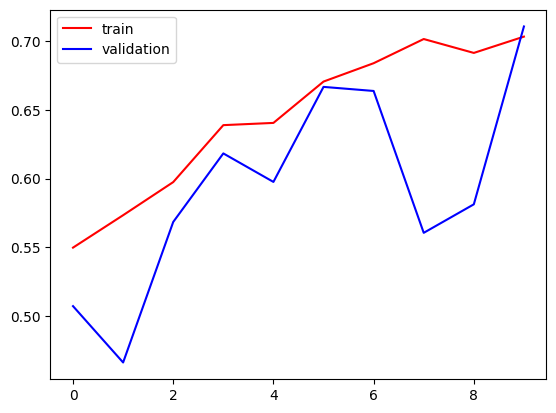

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

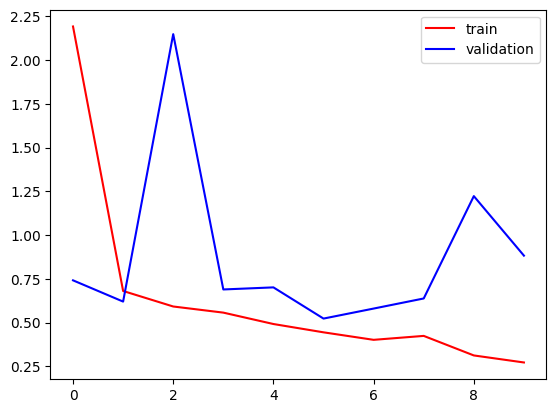

In [22]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

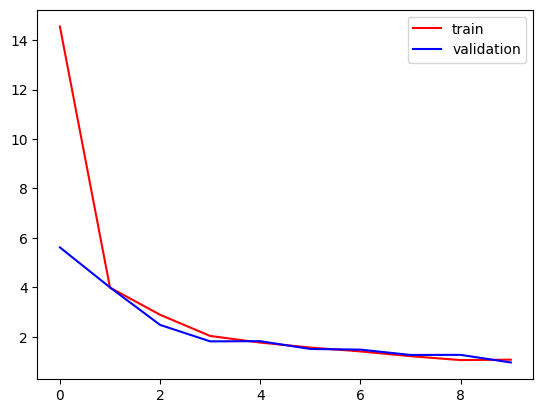

In [42]:
plt.plot(history.history["loss"], color = "red", label = "train")  #this is after the l2regularization
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#add more data
#data augementation
#l1/l2 regularizer
#dropout
#batch norm
#reduce complexity

In [23]:
import cv2

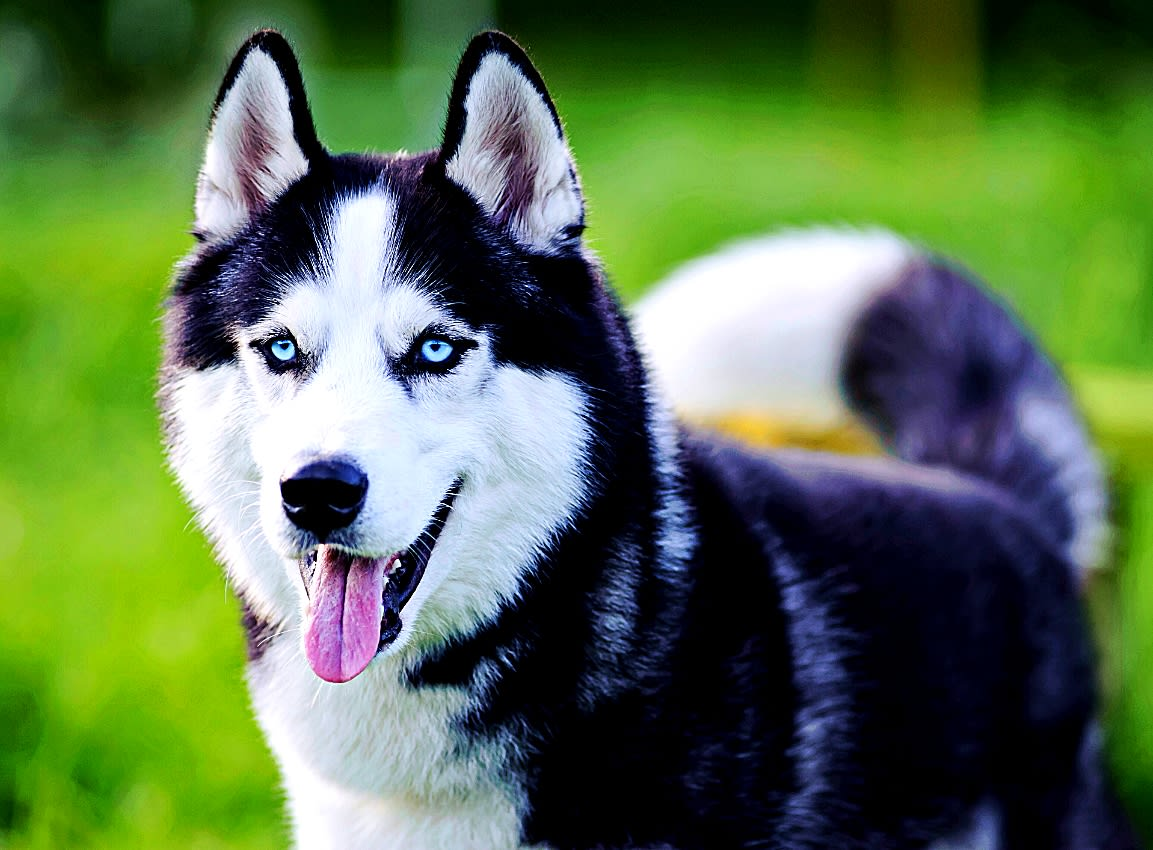

In [25]:
from google.colab.patches import cv2_imshow
import cv2

# Load the image first before attempting to display it
img = cv2.imread("/content/siberian-husky-107212 (1).jpg")

# Check if the image was loaded successfully
if img is not None:
    cv2_imshow(img)
else:
    print("Error: Image not found or could not be loaded.")

In [26]:
img = cv2.resize(img,(256,256))

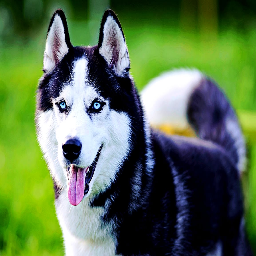

In [29]:
cv2_imshow(img)

In [30]:
test_input = img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)